In [ ]:
from base64 import b64encode
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Simple Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def f(x):
    A = 10
    return A + (x**2 - A * np.cos(np.pi * x * 2))

# Derivative (gradient) of the Rastrigin function
def df(x):
    A = 10
    return 2 * x + np.pi * 2 * A * np.sin(2 * np.pi * x)

# Generate function plot
x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

# Gradient Descent with Momentum
learning_rate = 0.0005
momentum = 0.9
x_momentum = 4.4  # Start position
velocity = 0  # Initialize velocity
momentum_steps = [x_momentum]

for _ in range(60):  # Iterate gradient descent with momentum
    grad = df(x_momentum)
    velocity = learning_rate * grad
    x_momentum -= velocity
    momentum_steps.append(x_momentum)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label='f(x) = Rastrigin Function', color='blue')
ax.legend()

ball, = ax.plot([], [], 'ro', markersize=10)  # Ball

# Initialize function for animation
def init():
    ball.set_data([], [])
    return ball,

# Update function for animation
def update(frame):
    x_pos = [momentum_steps[frame]]  # Convert to list
    y_pos = [f(x_pos[0])]  # Convert to list
    ball.set_data(x_pos, y_pos)
    return ball,

ani = animation.FuncAnimation(fig, update, frames=len(momentum_steps), init_func=init, interval=50, repeat=False)
ani.save('gradient_descent.mp4', writer='ffmpeg', fps=15)
plt.close(fig)


In [ ]:
mp4 = open("gradient_descent.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

# Momentum

In [ ]:
def f(x):
    A = 10
    return A + (x**2 - A * np.cos(np.pi * x * 2))

def df(x):
    A = 10
    return 2 * x + np.pi * 2 * A * np.sin(2 * np.pi * x)

x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

learning_rate = 0.005
momentum = 0.95
x_momentum = 4.4
velocity = 0
momentum_steps = [x_momentum]

# for _ in range(80):
#     grad = df(x_momentum)
#     velocity = momentum * velocity + learning_rate * grad
#     x_momentum = x_momentum - velocity
#     momentum_steps.append(x_momentum)

for _ in range(80):  # Iterate gradient descent with momentum
    grad = df(x_momentum)
    velocity = momentum * velocity + (1-momentum) * grad
    x_momentum = x_momentum - learning_rate * velocity
    momentum_steps.append(x_momentum)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label='f(x) = Rastrigin Function', color='blue')
ax.legend()

ball, = ax.plot([], [], 'ro', markersize=10)  # Ball

# Initialize function for animation
def init():
    ball.set_data([], [])
    return ball,

# Update function for animation
def update(frame):
    x_pos = [momentum_steps[frame]]  # Convert to list
    y_pos = [f(x_pos[0])]  # Convert to list
    ball.set_data(x_pos, y_pos)
    return ball,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(momentum_steps), init_func=init, interval=200, repeat=False)

# Save animation to file
ani.save('momentum_gradient_descent.mp4', writer='ffmpeg', fps=10)
plt.close(fig)


In [ ]:
# Display the saved animation in Colab
from base64 import b64encode

mp4 = open("momentum_gradient_descent.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

In [ ]:

# Define function and derivative
def f(x):
    A = 10
    return A + (x**2 - A * np.cos(np.pi * x * 2))

# Derivative (gradient) of the Rastrigin function
def df(x):
    A = 10
    return 2 * x + np.pi * 2 * A * np.sin(2 * np.pi * x)

# Generate function plot
x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

# NAG Gradient Descent with Momentum
learning_rate = 0.05
momentum = 0.999
x_nag = 4.4  # Start position
velocity = 0  # Initialize velocity
nag_steps = [x_nag]
# beta = 0.95

for _ in range(80):
    x_lookahead = x_nag - momentum * velocity  # Lookahead position
    grad_lookahead = df(x_lookahead)

    velocity = momentum * velocity + learning_rate * grad_lookahead
    x_nag = x_nag - velocity
    nag_steps.append(x_nag)


# for _ in range(80):
#     x_lookahead = x_nag - momentum * velocity  # Lookahead position
#     grad_lookahead = df(x_lookahead)

#     velocity = momentum * velocity + (1-momentum) * grad_lookahead
#     x_nag = x_nag - learning_rate * velocity
#     nag_steps.append(x_nag)


# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label='f(x) = Rastrigin Function', color='blue')
ax.legend()

ball, = ax.plot([], [], 'ro', markersize=10)  # Ball

# Initialize function for animation
def init():
    ball.set_data([], [])
    return ball,

# Update function for animation
def update(frame):
    x_pos = [nag_steps[frame]]  # Convert to list
    y_pos = [f(x_pos[0])]  # Convert to list
    ball.set_data(x_pos, y_pos)
    return ball,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(nag_steps), init_func=init, interval=200, repeat=False)

# Save animation to file
ani.save('NAG_gradient_descent.mp4', writer='ffmpeg', fps=15)
plt.close(fig)


In [ ]:
# Display the saved animation in Colab
from base64 import b64encode

mp4 = open("NAG_gradient_descent.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

# Momentum vs Adagrad

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Funtion with flat region
def f(x):
    return 10 / (1 + np.exp(-5 * x))  # Sigmoid transition instead of hard step

def df(x):
    return 50 * np.exp(-5 * x) / (1 + np.exp(-5 * x))**2  # Smoothed derivative

# def f(x):
#     return np.exp(-0.5 * x) + 10 / (1 + np.exp(-5 * (x - 3)))

# def df(x):
#     return -0.5 * np.exp(-0.5 * x) + 50 * np.exp(-5 * (x - 3)) / (1 + np.exp(-5 * (x - 3)))**2

# Generate function plot

# Define function (Rastrigin) and derivative
# def f(x):
#     A = 10
#     return x**2 + A * np.sin(x)**2

# def df(x):
#     A = 10
#     return 2 * x + 2 * A * np.sin(x) * np.cos(x)

# Generate function plot
x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

# Initialize parameters
learning_rate = 0.1  # Increased for better Adagrad updates
momentum = 0.9
x_momentum, x_adagrad = 4.4, 4.4  # Start positions
velocity, G = 0, 0
epsilon = 1e-8  # Small constant to prevent division by zero

momentum_steps = [x_momentum]
adagrad_steps = [x_adagrad]

# Iterate Gradient Descent with Momentum & Adagrad
for _ in range(100):
    # Momentum
    grad_m = df(x_momentum)
    velocity = momentum * velocity - learning_rate * grad_m
    x_momentum += velocity
    momentum_steps.append(x_momentum)

    # Adagrad
    grad_a = df(x_adagrad)
    G += grad_a ** 2  # Accumulate squared gradients
    adaptive_lr = learning_rate / (np.sqrt(G) + epsilon)  # Adaptive learning rate
    x_adagrad -= adaptive_lr * grad_a  # Update step
    # print(grad_a)
    adagrad_steps.append(x_adagrad)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label="Rastrigin Function", color="blue")
ax.legend()

ball_momentum, = ax.plot([], [], 'ro', markersize=10, label="Momentum GD")  # Red Ball
ball_adagrad, = ax.plot([], [], 'go', markersize=10, label="Adagrad GD")  # Green Ball

# Initialize function for animation
def init():
    ball_momentum.set_data([], [])
    ball_adagrad.set_data([], [])
    return ball_momentum, ball_adagrad

# Update function for animation
def update(frame):
    if frame < len(momentum_steps):  # Ensure it doesn't go out of bounds
        x_m = momentum_steps[frame]
        y_m = f(x_m)
        ball_momentum.set_data([x_m], [y_m])

    if frame < len(adagrad_steps):  # Ensure it doesn't go out of bounds
        x_a = adagrad_steps[frame]
        y_a = f(x_a)
        ball_adagrad.set_data([x_a], [y_a])

    return ball_momentum, ball_adagrad

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(momentum_steps), init_func=init, interval=100, repeat=False)

ani.save('gradient_descent_comparison.mp4', writer='ffmpeg', fps=10)
plt.close(fig)


In [ ]:
# Display the saved animation in Colab
from base64 import b64encode

mp4 = open("gradient_descent_comparison.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

# Adagrad vs Rmsprop

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Funtion with flat region
def f(x):
    return 10 / (1 + np.exp(-5 * x))  # Sigmoid transition instead of hard step

def df(x):
    return 50 * np.exp(-5 * x) / (1 + np.exp(-5 * x))**2  # Smoothed derivative

# Generate function plot
x_vals = np.linspace(-2, 6, 500)
y_vals = f(x_vals)

# Initialize parameters
learning_rate = 0.1
decay_rate = 0.9  # RMSprop decay factor
epsilon = 1e-8  # Small constant

x_adagrad, x_rmsprop = 4.5, 4.5  # Start positions
G_adagrad, G_rmsprop = 0, 0  # Accumulate squared gradients
rms_cache = 0

adagrad_steps = [x_adagrad]
rmsprop_steps = [x_rmsprop]

# Iterate Gradient Descent with Adagrad & RMSprop
for _ in range(100):
    # Adagrad
    grad_a = df(x_adagrad)
    G_adagrad += grad_a ** 2  # Accumulate squared gradients
    adaptive_lr = learning_rate / (np.sqrt(G_adagrad) + epsilon)  # Adaptive learning rate
    x_adagrad -= adaptive_lr * grad_a  # Update step
    adagrad_steps.append(x_adagrad)

    # RMSprop
    grad_r = df(x_rmsprop)
    rms_cache = decay_rate * rms_cache + (1 - decay_rate) * grad_r ** 2  # Exponential moving average
    adaptive_lr_rms = learning_rate / (np.sqrt(rms_cache) + epsilon)
    x_rmsprop -= adaptive_lr_rms * grad_r  # Update step
    rmsprop_steps.append(x_rmsprop)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label=r"$\mathbf{f(x) = \frac{10}{1 + e^{-5x}}}$", color="blue")

# plt.plot(x_vals, y_vals, label="Function: $x^2 + \sin(3x)$", color="blue")

ball_adagrad, = ax.plot([], [], 'ro', markersize=10, label="Adagrad")  # Red Ball
ball_rmsprop, = ax.plot([], [], 'go', markersize=10, label="RMSprop")  # Green Ball
ax.legend(fontsize=14)  # Adjust font size (increase if needed)

# Initialize function for animation
def init():
    ball_adagrad.set_data([], [])
    ball_rmsprop.set_data([], [])
    return ball_adagrad, ball_rmsprop

# Update function for animation
def update(frame):
    if frame < len(adagrad_steps):  # Ensure it doesn't go out of bounds
        x_a = adagrad_steps[frame]
        y_a = f(x_a)
        ball_adagrad.set_data([x_a], [y_a])

    if frame < len(rmsprop_steps):  # Ensure it doesn't go out of bounds
        x_r = rmsprop_steps[frame]
        y_r = f(x_r)
        ball_rmsprop.set_data([x_r], [y_r])

    return ball_adagrad, ball_rmsprop

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(adagrad_steps), init_func=init, interval=100, repeat=False)

# Save animation
ani.save('adagrad_vs_rmsprop.mp4', writer='ffmpeg', fps=10)
plt.close(fig)


In [ ]:
mp4 = open("adagrad_vs_rmsprop.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

# Adam vs Rmsprop

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(x):
    return 10 / (1 + np.exp(-5 * x))  # Sigmoid transition instead of hard step

def df(x):
    return 50 * np.exp(-5 * x) / (1 + np.exp(-5 * x))**2  # Smoothed derivative

# Vectorized functions
f_vec = np.vectorize(f)
df_vec = np.vectorize(df)

# Generate function plot
x_vals = np.linspace(-6, 6, 500)
y_vals = f_vec(x_vals)

# Initialize parameters
learning_rate = 0.1
beta1 = 0.9   # Adam momentum term
beta2 = 0.999  # Adam second moment decay rate
decay_rate = 0.9  # RMSprop decay rate
epsilon = 1e-8  # Small constant to prevent division by zero

x_rmsprop, x_adam = 4.9, 4.9  # Start positions
G_rmsprop, G_adam = 0, 0
m_adam = 0  # Momentum for Adam
t = 1  # Time step for Adam bias correction

rmsprop_steps = [x_rmsprop]
adam_steps = [x_adam]

# Iterate Gradient Descent with RMSprop & Adam
for _ in range(100):
    # RMSprop Update
    grad_r = df(x_rmsprop)
    G_rmsprop = decay_rate * G_rmsprop + (1 - decay_rate) * grad_r ** 2  # Exponential moving average
    adaptive_lr_r = learning_rate / (np.sqrt(G_rmsprop) + epsilon)  # Adaptive learning rate
    x_rmsprop -= adaptive_lr_r * grad_r  # Update step
    rmsprop_steps.append(x_rmsprop)

    # Adam Update
    grad_a = df(x_adam)
    m_adam = beta1 * m_adam + (1 - beta1) * grad_a  # First moment estimate
    G_adam = beta2 * G_adam + (1 - beta2) * grad_a ** 2  # Second moment estimate
    m_hat = m_adam / (1 - beta1 ** t)  # Bias correction for first moment
    G_hat = G_adam / (1 - beta2 ** t)  # Bias correction for second moment

    m_hat = max(m_hat, m_adam)
    G_hat = max(G_hat, G_adam)  # AMSGrad variant

    adaptive_lr_a = learning_rate / (np.sqrt(G_hat) + epsilon)  # Adaptive learning rate
    x_adam -= adaptive_lr_a * m_hat  # Update step
    adam_steps.append(x_adam)

    t += 1  # Increase time step

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label="Sparse Step Function", color="blue")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()

ball_rmsprop, = ax.plot([], [], 'bo', markersize=10, label="RMSprop GD")  # Blue Ball
ball_adam, = ax.plot([], [], 'ro', markersize=10, label="Adam GD")  # Red Ball

# Initialize function for animation
def init():
    ball_rmsprop.set_data([], [])
    ball_adam.set_data([], [])
    return ball_rmsprop, ball_adam

# Update function for animation
def update(frame):
    if frame < len(rmsprop_steps):  # Ensure it doesn't go out of bounds
        x_r = rmsprop_steps[frame]
        y_r = f(x_r)
        ball_rmsprop.set_data([x_r], [y_r])

    if frame < len(adam_steps):  # Ensure it doesn't go out of bounds
        x_a = adam_steps[frame]
        y_a = f(x_a)
        ball_adam.set_data([x_a], [y_a])

    return ball_rmsprop, ball_adam

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(rmsprop_steps), init_func=init, interval=100, repeat=False)

# Save animation
ani.save('rmsprop_vs_adam.mp4', writer='ffmpeg', fps=10)
plt.close(fig)

In [ ]:
mp4 = open("rmsprop_vs_adam.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

# Adam, Nadam, Adabelief

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define a sparse step-like function
def f(x):
    return x**2 + np.cos(10*x) + np.sin(5*x)

# Compute the derivative (gradient)
def df(x):
    return 2*x - 10*np.sin(10*x) + 5*np.cos(5*x)


# Generate function plot
x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

# Initialize parameters
learning_rate = 0.25
beta1 = 0.95  # Momentum term
beta2 = 0.95  # RMS term
epsilon = 1e-8  # Small constant to prevent division by zero

x_adam, x_nadam, x_adamax, x_adabelief = 4.4, 4.4, 4.4, 4.4  #
m_adam, v_adam = 0, 0
m_nadam, v_nadam = 0, 0
m_adamax, v_adamax = 0, 0
m_adabelief, v_adabelief = 0, 0

adam_steps = [x_adam]
nadam_steps = [x_nadam]
adabelief_steps = [x_adabelief]

for t in range(1, 250):
    # Adam
    grad_adam = df(x_adam)
    m_adam = beta1 * m_adam + (1 - beta1) * grad_adam
    v_adam = beta2 * v_adam + (1 - beta2) * (grad_adam ** 2)
    m_hat_adam = m_adam / (1 - beta1 ** t)
    v_hat_adam = v_adam / (1 - beta2 ** t)
    x_adam -= learning_rate * m_hat_adam / (np.sqrt(v_hat_adam) + epsilon)
    adam_steps.append(x_adam)

    # NAdam
    grad_nadam = df(x_nadam)
    m_nadam = beta1 * m_nadam + (1 - beta1) * grad_nadam
    v_nadam = beta2 * v_nadam + (1 - beta2) * (grad_nadam ** 2)
    m_hat_nadam = (beta1 * m_nadam + (1 - beta1) * grad_nadam) / (1 - beta1 ** t)
    v_hat_nadam = v_nadam / (1 - beta2 ** t)
    x_nadam -= learning_rate * (m_hat_nadam / (np.sqrt(v_hat_nadam) + epsilon))
    nadam_steps.append(x_nadam)

    #Adabelief
    grad_adabelief = df(x_adabelief)
    m_adabelief = beta1 * m_adabelief + (1 - beta1) * grad_adabelief
    v_adabelief = beta2 * v_adabelief + (1 - beta2) * ((grad_adabelief-m_adabelief) ** 2)
    m_hat_adabelief = m_adabelief / (1 - beta1 ** t)
    v_hat_adabelief = v_adabelief / (1 - beta2 ** t)
    x_adabelief -= learning_rate * m_hat_adabelief/ (np.sqrt(v_hat_adabelief) + epsilon)
    adabelief_steps.append(x_adabelief)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label="Sparse Function", color="blue")
ball_adam, = ax.plot([], [], 'ro', markersize=10, label="Adam")  # Red Ball
ball_nadam, = ax.plot([], [], 'go', markersize=10, label="NAdam")  # Green Ball
ball_adabelief, = ax.plot([], [], 'mo', markersize=10, label="Adabelief")  # Green Ball
ax.legend()

# Initialize function for animation
def init():
    ball_adam.set_data([], [])
    ball_nadam.set_data([], [])
    ball_adabelief.set_data([], [])
    return ball_adam, ball_nadam, ball_adabelief

# Update function for animation
def update(frame):
    if frame < len(adam_steps):  # Ensure it doesn't go out of bounds
        x_a = adam_steps[frame]
        y_a = f(x_a)
        ball_adam.set_data([x_a], [y_a])

    if frame < len(nadam_steps):  # Ensure it doesn't go out of bounds
        x_n = nadam_steps[frame]
        y_n = f(x_n)
        ball_nadam.set_data([x_n], [y_n])

    if frame < len(adabelief_steps):  # Ensure it doesn't go out of bounds
        x_ab = adabelief_steps[frame]
        y_ab = f(x_ab)
        ball_adabelief.set_data([x_ab], [y_ab])

    return ball_adam, ball_nadam, ball_adabelief

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(adam_steps), init_func=init, interval=200, repeat=False)

ani.save('adam_vs_nadam.mp4', writer='ffmpeg', fps=15)
plt.close(fig)


In [ ]:
mp4 = open("adam_vs_nadam.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

# Adabelief actually finds problem in Adam. Makes it faster as Adam's momentum

# Instead of tracking the magnitude of the gradient, track how much the current gradient deviates from its historical mean.

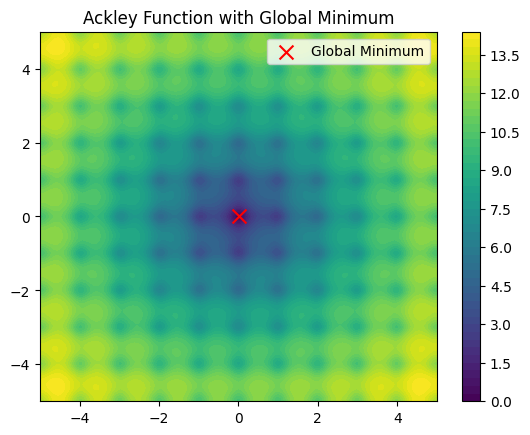

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ackley function in 2D
def ackley(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
           np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

# Grid for visualization
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = ackley(X, Y)

# Find the global minimum
min_index = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
x_min, y_min = X[min_index], Y[min_index]

# Plot contour map
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.scatter(x_min, y_min, color='red', marker='x', s=100, label="Global Minimum")
plt.legend()
plt.title("Ackley Function with Global Minimum")
plt.show()


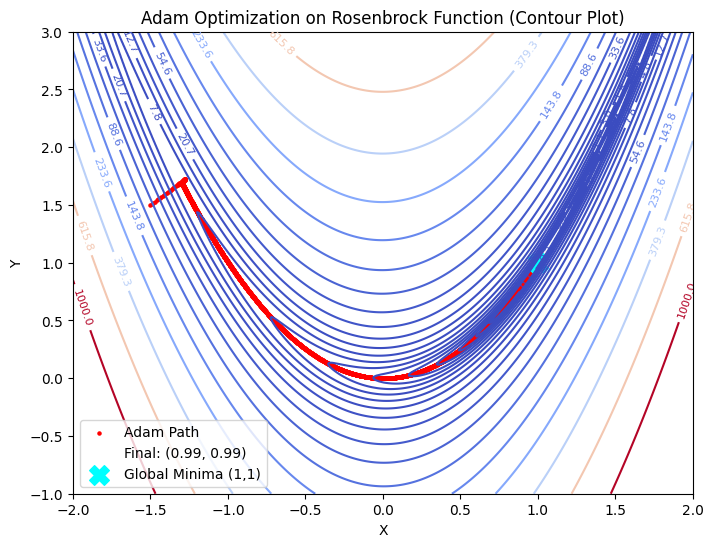

Final Position: (0.99349, 0.98700) with Function Value: 0.00004


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Gradients of the Rosenbrock function
def df_dx(x, y):
    return -2 * (1 - x) - 400 * x * (y - x**2)

def df_dy(x, y):
    return 200 * (y - x**2)

# Adam Optimizer Parameters
lr = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
max_iters = 5000  # More iterations due to Rosenbrock's shape

# Initialize at a random starting point
x, y = -1.5, 1.5  # Far from the global minimum (1,1)
m_x, m_y = 0, 0  # First moment
v_x, v_y = 0, 0  # Second moment

trajectory = [(x, y)]

# Adam Optimization Loop
for t in range(1, max_iters + 1):
    # Compute gradients
    grad_x = df_dx(x, y)
    grad_y = df_dy(x, y)

    # Update biased first moment estimate
    m_x = beta1 * m_x + (1 - beta1) * grad_x
    m_y = beta1 * m_y + (1 - beta1) * grad_y

    # Update biased second raw moment estimate
    v_x = beta2 * v_x + (1 - beta2) * (grad_x ** 2)
    v_y = beta2 * v_y + (1 - beta2) * (grad_y ** 2)

    # Bias correction
    m_x_hat = m_x / (1 - beta1 ** t)
    m_y_hat = m_y / (1 - beta1 ** t)
    v_x_hat = v_x / (1 - beta2 ** t)
    v_y_hat = v_y / (1 - beta2 ** t)

    # Update parameters
    x -= lr * m_x_hat / (np.sqrt(v_x_hat) + epsilon)
    y -= lr * m_y_hat / (np.sqrt(v_y_hat) + epsilon)

    trajectory.append((x, y))

# Extract optimization path
x_vals, y_vals = zip(*trajectory)
min_x, min_y = x_vals[-1], y_vals[-1]
min_val = rosenbrock(min_x, min_y)

# Create a contour plot
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
Z = rosenbrock(X, Y)

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap="coolwarm")
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines
plt.scatter(x_vals, y_vals, color="red", s=5, label="Adam Path")  # Adam trajectory
plt.scatter(min_x, min_y, color="white", marker="*", s=100, label=f"Final: ({min_x:.2f}, {min_y:.2f})")
plt.scatter(1, 1, color="cyan", marker="X", s=200, label="Global Minima (1,1)")  # Marking global minima
plt.legend()
plt.title("Adam Optimization on Rosenbrock Function (Contour Plot)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

print(f"Final Position: ({min_x:.5f}, {min_y:.5f}) with Function Value: {min_val:.5f}")


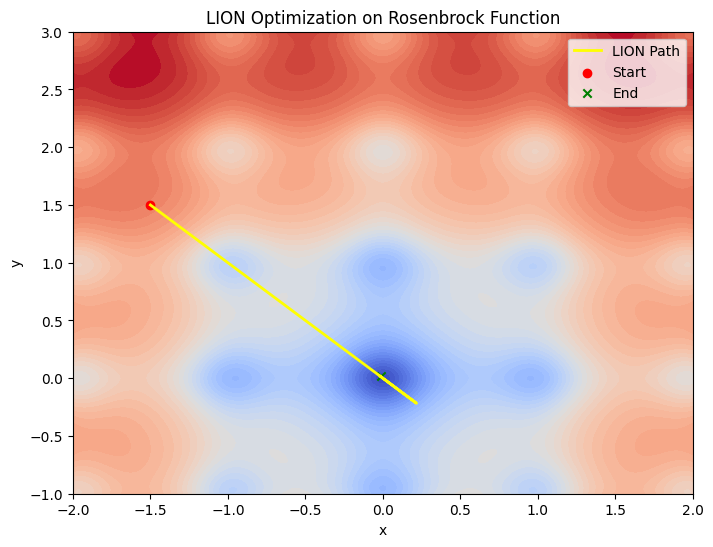

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

# Ackley function
def f(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
           np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

# Gradient of Ackley function
def df(x, y):
    part1 = (4 / 5) * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) / np.sqrt(x**2 + y**2)
    dfdx = part1 * x + np.pi * np.sin(2 * np.pi * x) * np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
    dfdy = part1 * y + np.pi * np.sin(2 * np.pi * y) * np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
    return np.array([dfdx, dfdy])

# # Rosenbrock function
# def f(x, y):
#     return (1 - x)**2 + 100 * (y - x**2)**2

# # Gradient of Rosenbrock function
# def df(x, y):
#     dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
#     dfdy = 200 * (y - x**2)
#     return np.array([dfdx, dfdy])

# LION Optimization Parameters
learning_rate = 0.1
momentum = 0.9
max_iterations = 5000

# Initialize position and momentum
x = np.array([-1.5, 1.5])  # Start far from minimum (1,1)
v = np.zeros_like(x)

# Track the path
path = [x.copy()]

# LION Optimization Loop
for t in range(max_iterations):
    grad = df(x[0], x[1])  # Compute gradient
    v = momentum * v + (1 - momentum) * grad  # Momentum update
    x -= learning_rate * 5*np.tanh(v)
    path.append(x.copy())

path = np.array(path)

# Plot the Rosenbrock function contour and LION path
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="coolwarm")
plt.plot(path[:, 0], path[:, 1], 'yellow', linewidth=2, label="LION Path")
plt.scatter(path[0, 0], path[0, 1], color="red", marker="o", label="Start")
plt.scatter(path[-1, 0], path[-1, 1], color="green", marker="x", label="End")
plt.legend()
plt.title("LION Optimization on Rosenbrock Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Lion optimizer

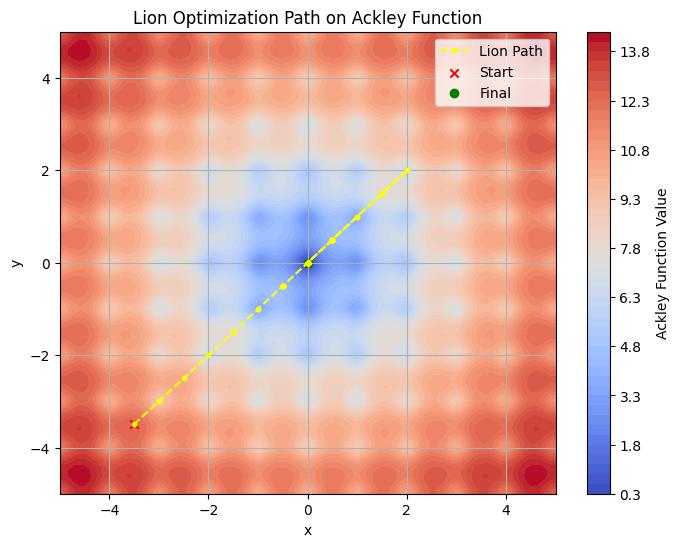

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ackley Function
def f(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.exp(1) + 20

# Gradient of Ackley Function
def df(x):
    denom = np.sqrt(0.5 * (x[0]**2 + x[1]**2)) + 1e-8  # Avoid division by zero
    grad_x1 = (0.2 * x[0] * np.exp(-0.2 * denom) / denom) + (2 * np.pi * np.sin(2 * np.pi * x[0]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))))
    grad_x2 = (0.2 * x[1] * np.exp(-0.2 * denom) / denom) + (2 * np.pi * np.sin(2 * np.pi * x[1]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))))
    return np.array([grad_x1, grad_x2])

# Lion Optimizer
def lion_ackley(lr=0.5, beta1=0.9, beta2=0.99, max_iter=500):
    x = np.array([-4.0, -4.0])  # Initial position
    m = np.zeros(2)  # Momentum term
    history = []

    for t in range(1, max_iter + 1):
        grad = df(x)

        # Momentum update
        m = beta1 * m + (1 - beta1) * grad

        # Lion update (sign-based)
        x = x - lr * np.sign(m)

        history.append(x.copy())

    return np.array(history)

# Run Lion Optimization
history = lion_ackley()

# Plot optimization path
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.array([[f([x, y]) for x, y in zip(X_row, Y_row)] for X_row, Y_row in zip(X, Y)])

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="coolwarm")
plt.colorbar(label="Ackley Function Value")

# Plot optimization path
history_x, history_y = history[:, 0], history[:, 1]
plt.plot(history_x, history_y, marker="o", markersize=3, color="yellow", linestyle="dashed", label="Lion Path")
plt.scatter(history_x[0], history_y[0], color="red", marker="x", label="Start")
plt.scatter(history_x[-1], history_y[-1], color="green", marker="o", label="Final")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Lion Optimization Path on Ackley Function")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Ackley Function
def f(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.exp(1) + 20

# Gradient of Ackley function
def df(x):
    denom = np.sqrt(0.5 * (x[0]**2 + x[1]**2)) + 1e-8  # Avoid division issues
    grad_x1 = 0.2 * x[0] * np.exp(-0.2 * denom) / denom + 2 * np.pi * np.sin(2 * np.pi * x[0]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))
    grad_x2 = 0.2 * x[1] * np.exp(-0.2 * denom) / denom + 2 * np.pi * np.sin(2 * np.pi * x[1]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))
    return np.array([grad_x1, grad_x2])

# Adam optimizer parameters
learning_rate = 0.5  # Reduced learning rate
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initialize variables
x_adam = np.array([4.5, 4.5])
m = np.zeros_like(x_adam)
v = np.zeros_like(x_adam)
t = 0
max_iter = 200
adam_steps = [x_adam.copy()]

# Gradient Descent with Adam
# for _ in range(100):
#     t += 1
#     grad = df(x_adam)

#     m = beta1 * m + (1 - beta1) * grad
#     v = beta2 * v + (1 - beta2) * grad**2

#     m_hat = m / (1 - beta1**t)
#     v_hat = v / (1 - beta2**t)

#     x_adam -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
#     x_adam = np.clip(x_adam, -5, 5)  # Ensure values remain within bounds
#     adam_steps.append(x_adam.copy())

for t in range(1, max_iter + 1):
    grad = df(x_adam)

    # Momentum update
    m = beta1 * m + (1 - beta1) * grad

    # Lion update (sign-based)
    x_adam = x_adam - lr * np.sign(m)

    adam_steps.append(x_adam.copy())

# Prepare for animation
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the Ackley function plot
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_vals = np.array([f([x, y]) for x, y in zip(np.ravel(x_grid), np.ravel(y_grid))])
z_grid = z_vals.reshape(x_grid.shape)

# Plot Ackley function
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none', alpha=0.7)

# Initialize function for animation
path = np.array(adam_steps)

# Create plot elements
ball_adam, = ax.plot([], [], [], 'ro', markersize=12, label="Adam Path")
line_adam, = ax.plot([], [], [], 'r-', lw=2, label="Adam Gradient Path")

# Set axis limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 15])  # Manually set reasonable Z limits

# Function to initialize the animation
def init():
    ball_adam.set_data([], [])
    ball_adam.set_3d_properties([])
    line_adam.set_data([], [])
    line_adam.set_3d_properties([])
    return ball_adam, line_adam

# Function to update the animation at each frame
def update(frame):
    if frame < len(path):
        x_a, y_a = path[frame]
        z_a = f(path[frame])

        ball_adam.set_data([x_a], [y_a])
        ball_adam.set_3d_properties([z_a])

        if frame > 0:
            line_adam.set_data(path[:frame, 0], path[:frame, 1])
            line_adam.set_3d_properties(f(path[:frame].T))

    return ball_adam, line_adam

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(path), init_func=init, interval=200, repeat=False)

# Save animation
ani.save('adam_ackley.mp4', writer='ffmpeg', fps=15)
plt.close(fig)


In [ ]:
mp4 = open("adam_ackley.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

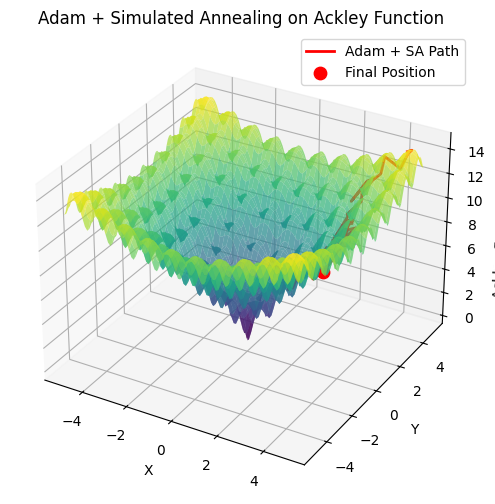

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Ackley Function
def f(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.exp(1) + 20

# Gradient of Ackley function
def df(x):
    denom = np.sqrt(0.5 * (x[0]**2 + x[1]**2)) + 1e-8  # Avoid division by zero
    grad_x1 = 0.2 * x[0] * np.exp(-0.2 * denom) / denom + 2 * np.pi * np.sin(2 * np.pi * x[0]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))
    grad_x2 = 0.2 * x[1] * np.exp(-0.2 * denom) / denom + 2 * np.pi * np.sin(2 * np.pi * x[1]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))
    return np.array([grad_x1, grad_x2])

# Adam parameters
learning_rate = 0.1
beta1 = 0.95
beta2 = 0.999
epsilon = 1e-8

# Simulated Annealing parameters
T_init = 10.0    # Initial temperature
T_min = 0.01    # Minimum temperature
cooling_rate = 0.99  # Cooling factor

# Initialize variables
x_adam = np.array([4.5, 4.5])  # Start far from the global minimum
m = np.zeros_like(x_adam)
v = np.zeros_like(x_adam)
t = 0
T = T_init

adam_steps = [x_adam.copy()]

# Gradient Descent with Adam + Simulated Annealing
for _ in range(100):
    t += 1
    grad = df(x_adam)

    # Adam Update
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad-m)**2

    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)

    x_new = x_adam - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    # Simulated Annealing Step: Add noise with probability
    # if np.random.rand() < np.exp(-t / (T + 1e-8)):  # Probability decreases as T decreases
    x_new = x_adam + np.random.uniform(-0.5, 0.5, size=2)  # Add randomness

    # Accept new position based on function value or probabilistic acceptance
    if f(x_new) < f(x_adam) or np.random.rand() < np.exp((f(x_adam) - f(x_new)) / (T + 1e-8)):
        x_adam = x_new

    # Clip values to remain within bounds
    x_adam = np.clip(x_adam, -5, 5)
    adam_steps.append(x_adam.copy())

    # Reduce temperature (cooling schedule)
    T *= cooling_rate
    T = max(T, T_min)

# 3D Plot for Interactive Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for Ackley function plot
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_vals = np.array([f([x, y]) for x, y in zip(np.ravel(x_grid), np.ravel(y_grid))])
z_grid = z_vals.reshape(x_grid.shape)

# Plot Ackley function
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none', alpha=0.7)

# Plot optimization path
path = np.array(adam_steps)
ax.plot(path[:, 0], path[:, 1], f(path.T), 'r-', label="Adam + SA Path", lw=2)
ax.scatter(path[-1, 0], path[-1, 1], f(path[-1]), color='red', s=80, label="Final Position")

# Labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Ackley Function Value")
ax.set_title("Adam + Simulated Annealing on Ackley Function")
ax.legend()

plt.show()


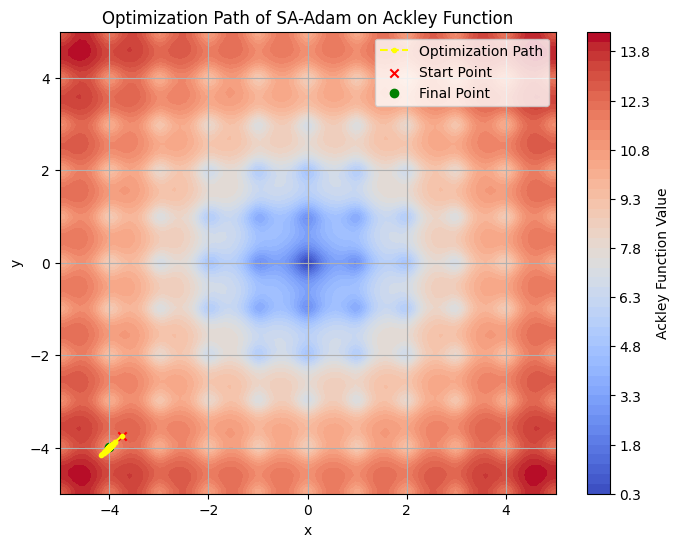

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ackley Function
def f(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.exp(1) + 20

# Gradient of Ackley Function
def df(x):
    denom = np.sqrt(0.5 * (x[0]**2 + x[1]**2)) + 1e-8  # Avoid division by zero
    grad_x1 = (0.2 * x[0] * np.exp(-0.2 * denom) / denom) + (2 * np.pi * np.sin(2 * np.pi * x[0]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))))
    grad_x2 = (0.2 * x[1] * np.exp(-0.2 * denom) / denom) + (2 * np.pi * np.sin(2 * np.pi * x[1]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))))
    return np.array([grad_x1, grad_x2])

# SA-Adam Optimizer
def sa_adam_ackley(lr=0.25, beta1=0.95, beta2=0.999, epsilon=1e-8,
                    T0=5.0, alpha=0.99, escape_threshold=1e-3, max_iter=500):

    x = (-4, -4)  # Random starting point
    m, v = np.zeros(2), np.zeros(2)  # Adam parameters
    T = T0  # Initial temperature
    history = []

    for t in range(1, max_iter + 1):
        grad_m = df(x)
        grad_v = df(x)
        m = beta1 * m + (1 - beta1) * grad_m
        v = beta2 * v + (1 - beta2) * ((grad_v) ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        x = x - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat
        history.append(x.copy())

    return np.array(history)

# Run SA-Adam
history = sa_adam_ackley()

# Plot optimization path
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.array([[f([x, y]) for x, y in zip(X_row, Y_row)] for X_row, Y_row in zip(X, Y)])

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="coolwarm")
plt.colorbar(label="Ackley Function Value")

# Plot optimization path
history_x, history_y = history[:, 0], history[:, 1]
plt.plot(history_x, history_y, marker="o", markersize=3, color="yellow", linestyle="dashed", label="Optimization Path")
plt.scatter(history_x[0], history_y[0], color="red", marker="x", label="Start Point")
plt.scatter(history_x[-1], history_y[-1], color="green", marker="o", label="Final Point")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimization Path of SA-Adam on Ackley Function")
plt.legend()
plt.grid()
plt.show()


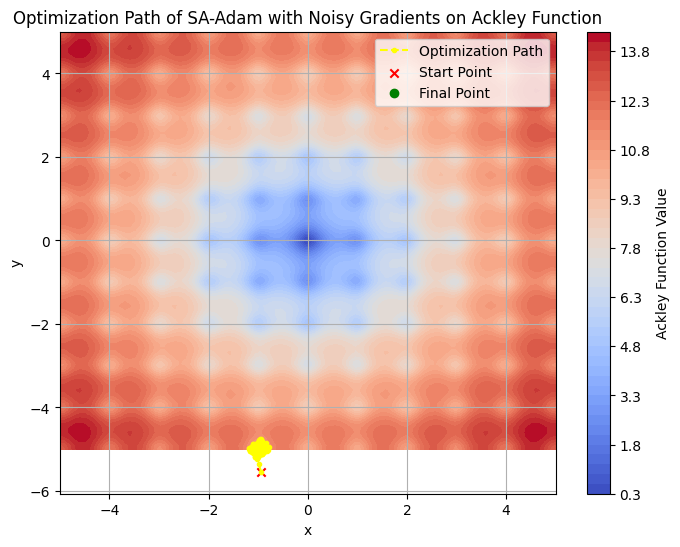

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ackley Function
def f(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.exp(1) + 20

# Gradient of Ackley Function
def df(x):
    denom = np.sqrt(0.5 * (x[0]**2 + x[1]**2)) + 1e-8  # Avoid division by zero
    grad_x1 = (0.2 * x[0] * np.exp(-0.2 * denom) / denom) + (2 * np.pi * np.sin(2 * np.pi * x[0]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))))
    grad_x2 = (0.2 * x[1] * np.exp(-0.2 * denom) / denom) + (2 * np.pi * np.sin(2 * np.pi * x[1]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))))
    return np.array([grad_x1, grad_x2])

# SA-Adam Optimizer with Noise in Gradients
def sa_adam_ackley_with_noise(lr=0.25, beta1=0.95, beta2=0.999, epsilon=1e-8,
                               T0=5.0, alpha=0.99, escape_threshold=1e-3, max_iter=500, noise_factor=0.):

    x = (-4, -4)  # Random starting point
    m, v = np.zeros(2), np.zeros(2)  # Adam parameters
    T = T0  # Initial temperature
    history = []

    for t in range(1, max_iter + 1):
        noise = np.random.normal(0, noise_factor, size=(2, ))  # Gaussian noise

        grad_m = df(x + noise)
        grad_v = df(x)

        # Apply Adam update rules
        m = beta1 * m + (1 - beta1) * grad_m
        v = beta2 * v + (1 - beta2) * (grad_v ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        x = x - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

        # Track the history for plotting
        history.append(x.copy())

    return np.array(history)

# Run SA-Adam with Noise
history = sa_adam_ackley_with_noise()

# Plot optimization path
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.array([[f([x, y]) for x, y in zip(X_row, Y_row)] for X_row, Y_row in zip(X, Y)])

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="coolwarm")
plt.colorbar(label="Ackley Function Value")

# Plot optimization path
history_x, history_y = history[:, 0], history[:, 1]
plt.plot(history_x, history_y, marker="o", markersize=3, color="yellow", linestyle="dashed", label="Optimization Path")
plt.scatter(history_x[0], history_y[0], color="red", marker="x", label="Start Point")
plt.scatter(history_x[-1], history_y[-1], color="green", marker="o", label="Final Point")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimization Path of SA-Adam with Noisy Gradients on Ackley Function")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import torch
import torch.optim as optim

# Ackley Function
def ackley(x):
    return -20 * torch.exp(-0.2 * torch.sqrt(0.5 * (x[0]**2 + x[1]**2))) - \
           torch.exp(0.5 * (torch.cos(2 * np.pi * x[0]) + torch.cos(2 * np.pi * x[1]))) + np.e + 20

# Multi-Start Adam Optimization
def multi_start_adam(n_starts=10, lr=0.05, steps=500):
    best_x = None
    best_f = float("inf")

    for i in range(n_starts):
        # Random initialization in range [-5, 5]
        x = torch.tensor(np.random.uniform(-5, 5, 2), dtype=torch.float32, requires_grad=True)
        optimizer = optim.Adam([x], lr=lr)

        for step in range(steps):
            optimizer.zero_grad()
            loss = ackley(x)
            loss.backward()
            optimizer.step()

        # Track best solution
        if loss.item() < best_f:
            best_f = loss.item()
            best_x = x.detach().numpy()

        print(f"Initialization: {x} Start {i+1}: Found minimum at {x.detach().numpy()}, Function Value: {loss.item()}")

    print(f"\nBest solution found: {best_x}, Function Value: {best_f}")

# Run Multi-Start Adam
multi_start_adam(n_starts=10, lr=0.1, steps=500)


Initialization: tensor([-2.9673,  0.9892], requires_grad=True) Start 1: Found minimum at [-2.9672594  0.9891542], Function Value: 7.180951118469238
Initialization: tensor([-3.9789, -2.9842], requires_grad=True) Start 2: Found minimum at [-3.9789245 -2.9842138], Function Value: 10.12035083770752
Initialization: tensor([-1.9908, -4.9768], requires_grad=True) Start 3: Found minimum at [-1.9907649 -4.976844 ], Function Value: 10.645028114318848
Initialization: tensor([1.9589e+00, 3.9549e-14], requires_grad=True) Start 4: Found minimum at [1.9589196e+00 3.9548829e-14], Function Value: 4.884064674377441
Initialization: tensor([0.9685, 0.9685], requires_grad=True) Start 5: Found minimum at [0.9684776 0.9684776], Function Value: 3.574451446533203
Initialization: tensor([-1.9873, -3.9745], requires_grad=True) Start 6: Found minimum at [-1.9873105 -3.9745402], Function Value: 9.353039741516113
Initialization: tensor([-3.9745, -1.9873], requires_grad=True) Start 7: Found minimum at [-3.97454   -1

Start 1: Found minimum at [ 4.9736114e+00 -1.2524549e-05], Function Value: 10.120331764221191
Start 2: Found minimum at [ 9.5216453e-01 -8.3370433e-06], Function Value: 2.5799293518066406
Start 3: Found minimum at [-8.5497186e-07 -1.6068030e-03], Function Value: 0.005157470703125
Start 4: Found minimum at [2.9672854 0.9891509], Function Value: 7.180952072143555
Start 5: Found minimum at [-2.9879994 -4.979959 ], Function Value: 11.217549324035645
Start 6: Found minimum at [-3.9830425 -3.983069 ], Function Value: 10.998261451721191
Start 7: Found minimum at [-3.9865677 -4.983208 ], Function Value: 11.90125560760498
Start 8: Found minimum at [-2.9731188 -1.9821293], Function Value: 7.961711883544922
Start 9: Found minimum at [0.9824136 1.9646157], Function Value: 5.381863594055176
Start 10: Found minimum at [7.7930937e-04 2.6152875e-05], Function Value: 0.002147674560546875

Best solution found: [7.7930937e-04 2.6152875e-05], Function Value: 0.002147674560546875


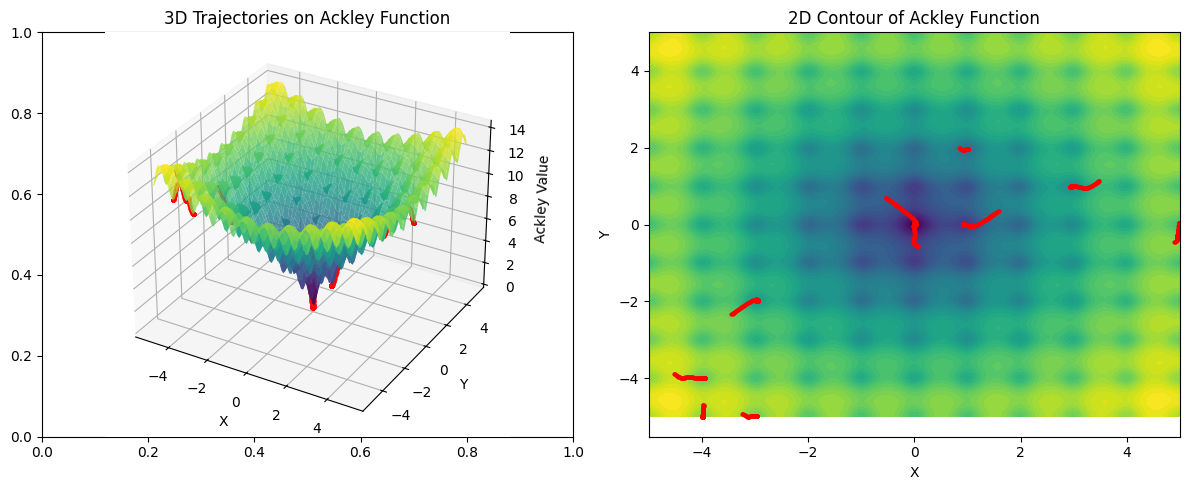

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Ackley Function
def ackley(x):
    return -20 * torch.exp(-0.2 * torch.sqrt(0.5 * (x[0]**2 + x[1]**2))) - \
           torch.exp(0.5 * (torch.cos(2 * np.pi * x[0]) + torch.cos(2 * np.pi * x[1]))) + np.e + 20

# Multi-Start Adam Optimization with Plotting
def multi_start_adam(n_starts=10, lr=0.01, steps=200):
    best_x = None
    best_f = float("inf")
    trajectories = []

    for i in range(n_starts):
        # Random initialization in range [-5, 5]
        x = torch.tensor(np.random.uniform(-5, 5, 2), dtype=torch.float32, requires_grad=True)
        optimizer = optim.Adam([x], lr=lr)

        traj = [x.detach().numpy().copy()]  # Track trajectory

        for step in range(steps):
            optimizer.zero_grad()
            loss = ackley(x)
            loss.backward()
            optimizer.step()

            traj.append(x.detach().numpy().copy())  # Store position

        trajectories.append(np.array(traj))

        # Track best solution
        if loss.item() < best_f:
            best_f = loss.item()
            best_x = x.detach().numpy()

        print(f"Start {i+1}: Found minimum at {x.detach().numpy()}, Function Value: {loss.item()}")

    print(f"\nBest solution found: {best_x}, Function Value: {best_f}")

    # Plot Results
    plot_trajectories(trajectories)

# Plot function surface and optimizer trajectories
def plot_trajectories(trajectories):
    # Generate grid for Ackley function
    x_vals = np.linspace(-5, 5, 100)
    y_vals = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.array([[ackley(torch.tensor([x, y])).item() for x, y in zip(X_row, Y_row)] for X_row, Y_row in zip(X, Y)])

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # 3D Surface Plot
    ax[0] = plt.subplot(1, 2, 1, projection='3d')
    ax[0].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    for traj in trajectories:
        ax[0].plot(traj[:, 0], traj[:, 1], [ackley(torch.tensor(p)).item() for p in traj], marker='o', markersize=2, linestyle='-', color='r')

    ax[0].set_title("3D Trajectories on Ackley Function")
    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")
    ax[0].set_zlabel("Ackley Value")

    # 2D Contour Plot
    ax[1].contourf(X, Y, Z, levels=50, cmap='viridis')

    for traj in trajectories:
        ax[1].plot(traj[:, 0], traj[:, 1], marker='o', markersize=2, linestyle='-', color='r')

    ax[1].set_title("2D Contour of Ackley Function")
    ax[1].set_xlabel("X")
    ax[1].set_ylabel("Y")

    plt.tight_layout()
    plt.show()

# Run Multi-Start Adam with Plotting
multi_start_adam(n_starts=10, lr=0.01, steps=200)


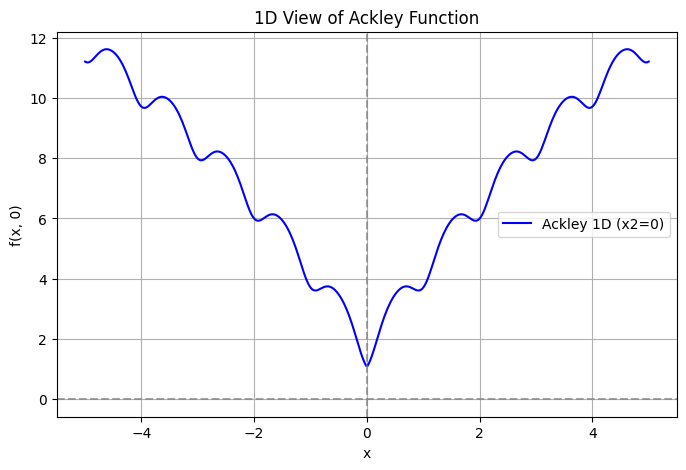

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ackley_1d(x):
    """ 1D view of Ackley function by fixing x2 = 0 """
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * x**2)) - np.exp(0.5 * np.cos(2 * np.pi * x)) + np.exp(1) + 20

# Generate x values
x = np.linspace(-5, 5, 400)
y = ackley_1d(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Ackley 1D (x2=0)", color='b')
plt.xlabel("x")
plt.ylabel("f(x, 0)")
plt.title("1D View of Ackley Function")
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 1D Ackley function
def ackley_1d(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * x**2)) - np.exp(0.5 * np.cos(2 * np.pi * x)) + np.exp(1) + 20

# Derivative of the function (gradient)
def ackley_1d_grad(x):
    term1 = (x / np.sqrt(0.5 * x**2)) * (0.2 / 2) * 20 * np.exp(-0.2 * np.sqrt(0.5 * x**2))
    term2 = np.pi * np.sin(2 * np.pi * x) * np.exp(0.5 * np.cos(2 * np.pi * x))
    return term1 + term2

# Adam optimizer function
def adam_optimization(grad_func, start_x, alpha=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=100):
    x = start_x  # Initial position
    m, v = 0, 0  # Momentum and velocity
    path = [x]  # To store optimization steps

    for t in range(1, max_iter + 1):
        g = grad_func(x)  # Compute gradient
        m = beta1 * m + (1 - beta1) * g  # Update biased first moment
        v = beta2 * v + (1 - beta2) * (g ** 2)  # Update biased second moment

        # Bias correction
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        x -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)  # Update parameter

        path.append(x)  # Store step

    return np.array(path)

# Run Adam optimization
start_x = 3.5  # Starting point
path = adam_optimization(ackley_1d_grad, start_x)

# Create animation
fig, ax = plt.subplots(figsize=(8, 5))
x_vals = np.linspace(-5, 5, 400)
y_vals = ackley_1d(x_vals)

ax.plot(x_vals, y_vals, label="Ackley Function", color="b")
sc = ax.scatter([], [], color="red", s=100, label="Adam Step")

def update(frame):
    sc.set_offsets([[path[frame], ackley_1d(path[frame])]])
    return sc,

ani = animation.FuncAnimation(fig, update, frames=len(path), interval=100, blit=True)

# Save animation
ani.save('adam_2d_ackley.mp4', writer='ffmpeg', fps=10)
plt.close(fig)

In [ ]:
mp4 = open("adam_2d_ackley.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

In [ ]:
mp4 = open("adabelief_2d_ackley.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

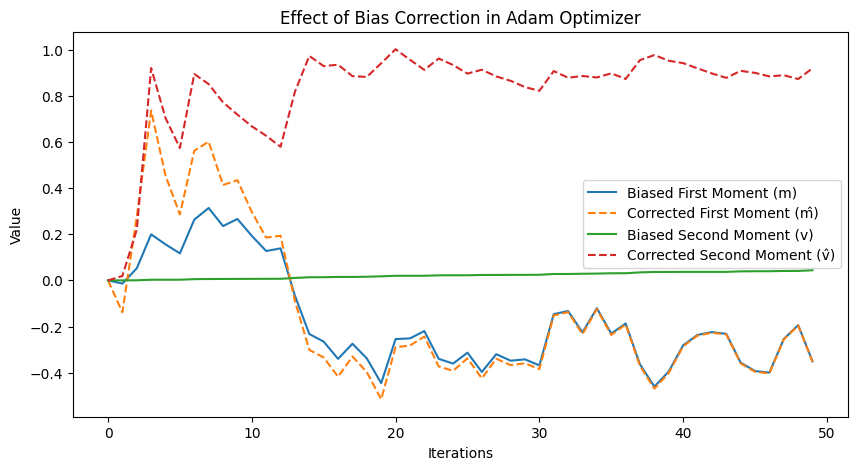

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
beta1 = 0.9  # Momentum decay factor
beta2 = 0.999  # RMSprop decay factor
timesteps = 50  # Number of iterations

# Simulated gradient values (random values for visualization)
np.random.seed(42)
gradients = np.random.randn(timesteps)

# Initialize moment estimates
m = np.zeros(timesteps)
v = np.zeros(timesteps)
m_hat = np.zeros(timesteps)
v_hat = np.zeros(timesteps)

# Compute biased and unbiased moments
for t in range(1, timesteps):
    m[t] = beta1 * m[t-1] + (1 - beta1) * gradients[t]
    v[t] = beta2 * v[t-1] + (1 - beta2) * gradients[t]**2

    m_hat[t] = m[t] / (1 - beta1**t)
    v_hat[t] = v[t] / (1 - beta2**t)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(m, label="Biased First Moment (m)")
plt.plot(m_hat, label="Corrected First Moment (m̂)", linestyle='dashed')
plt.plot(v, label="Biased Second Moment (v)")
plt.plot(v_hat, label="Corrected Second Moment (v̂)", linestyle='dashed')
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.legend()
plt.title("Effect of Bias Correction in Adam Optimizer")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(x):
    return x**2 + np.sin(5*x)

def df(x):
    return 2*x + 5*np.cos(5*x)

x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

# Initialize parameters
learning_rate = 0.1  # Increased for better Adagrad updates
momentum = 0.9
x_momentum, x_adagrad = 4.4, 4.4  # Start positions
velocity = 0
v_adagrad = 0

epsilon = 1e-8  # Small constant to prevent division by zero

momentum_steps = [x_momentum]
adagrad_steps = [x_adagrad]

# Iterate Gradient Descent with Momentum & Adagrad
for t in range(1, 150):
    grad_m = df(x_momentum)
    velocity = momentum * velocity + (1-momentum) * grad_m
    x_momentum = x_momentum - learning_rate  * velocity
    momentum_steps.append(x_momentum)

    grad_a = df(x_adagrad)
    v_adagrad = momentum * v_adagrad +  (1-momentum) * grad_a
    v_adagrad_corrected = v_adagrad/(1 - momentum**t)
    x_adagrad = x_adagrad - learning_rate * v_adagrad_corrected

    adagrad_steps.append(x_adagrad)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="Function: $x^2 + \sin(5x)$", color="blue")
ball_momentum, = ax.plot([], [], 'ro', markersize=10, label="Adam Momentum GD")  # Red Ball
ball_adagrad, = ax.plot([], [], 'go', markersize=10, label="Adam Momentum Bias Corrected GD")  # Green Ball
ax.legend(prop={'size': 14})  # Increase only formula label size

# Initialize function for animation
def init():
    ball_momentum.set_data([], [])
    ball_adagrad.set_data([], [])
    return ball_momentum, ball_adagrad

# Update function for animation
def update(frame):
    if frame < len(momentum_steps):  # Ensure it doesn't go out of bounds
        x_m = momentum_steps[frame]
        y_m = f(x_m)
        ball_momentum.set_data([x_m], [y_m])

    if frame < len(adagrad_steps):  # Ensure it doesn't go out of bounds
        x_a = adagrad_steps[frame]
        y_a = f(x_a)
        ball_adagrad.set_data([x_a], [y_a])

    return ball_momentum, ball_adagrad

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(momentum_steps), init_func=init, interval=200, repeat=False)

ani.save('bias_correction_momentum.mp4', writer='ffmpeg', fps=15)
plt.close(fig)


In [ ]:
mp4 = open("bias_correction_momentum.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(x):
    return x**2 + np.sin(3*x)  # A more complex function with oscillations

def df(x):
    return 2*x + 3*np.cos(3*x)  # The derivative


x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

# Initialize parameters
learning_rate = 0.1  # Increased for better Adagrad updates
gamma = 0.9999
x_rmsprop, x_rmsprop_bias = 4.4, 4.4  # Start positions
epsilon = 1e-8  # Small constant to prevent division by zero
G_rmsprop = 0
G_rmsprop_bias = 0
rmsprop_steps = [x_rmsprop]
bias_rms_steps = [x_rmsprop_bias]

# Iterate Gradient Descent with Momentum & Adagrad
for t in range(1, 100):
    grad_m = df(x_rmsprop)
    G_rmsprop = gamma * G_rmsprop + (1-gamma) * grad_m**2
    x_rmsprop = x_rmsprop - (learning_rate/(np.sqrt(G_rmsprop)+epsilon))*grad_m
    rmsprop_steps.append(x_rmsprop)

    grad_m_bias = df(x_rmsprop_bias)
    G_rmsprop_bias = gamma * G_rmsprop_bias + (1-gamma) * grad_m_bias**2
    G_rmsprop_corrected = G_rmsprop_bias/(1-gamma**t)
    x_rmsprop_bias = x_rmsprop_bias - (learning_rate/(np.sqrt(G_rmsprop_corrected)+epsilon))*grad_m_bias
    bias_rms_steps.append(x_rmsprop_bias)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="Function: $x^2 + \sin(3x)$", color="blue")
ball_rmsprop, = ax.plot([], [], 'ro', markersize=10, label="Adam Rmsprop GD")  # Red Ball
ball_rmsprop_bias, = ax.plot([], [], 'go', markersize=10, label="Adam RMSprop Bias Corrected GD")  # Green Ball
ax.legend()

# Initialize function for animation
def init():
    ball_rmsprop.set_data([], [])
    ball_rmsprop_bias.set_data([], [])
    return ball_rmsprop, ball_rmsprop_bias

# Update function for animation
def update(frame):
    if frame < len(rmsprop_steps):  # Ensure it doesn't go out of bounds
        x_m = rmsprop_steps[frame]
        y_m = f(x_m)
        ball_rmsprop.set_data([x_m], [y_m])

    if frame < len(bias_rms_steps):  # Ensure it doesn't go out of bounds
        x_a = bias_rms_steps[frame]
        y_a = f(x_a)
        ball_rmsprop_bias.set_data([x_a], [y_a])

    return ball_rmsprop, ball_rmsprop_bias

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(rmsprop_steps), init_func=init, interval=200, repeat=False)

ani.save('bias_correction_adaptive.mp4', writer='ffmpeg', fps=10)
plt.close(fig)


In [ ]:
mp4 = open("bias_correction_adaptive.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(x):
    return x**2 + np.sin(5*x)

def df(x):
    return 2*x + 5*np.cos(5*x)

f_vec = np.vectorize(f)
df_vec = np.vectorize(df)

# Generate function plot
x_vals = np.linspace(-6, 6, 500)
y_vals = f_vec(x_vals)

# Initialize parameters
learning_rate = 0.1
beta1 = 0.95   # Adam momentum term
beta2 = 0.999  # Adam second moment decay rate
decay_rate = 0.9  # RMSprop decay rate
epsilon = 1e-8  # Small constant to prevent division by zero

x_rmsprop, x_adam = 4.9, 4.9  # Start positions
G_rmsprop, G_adam = 0, 0
m_adam = 0  # Momentum for Adam
t = 1  # Time step for Adam bias correction

rmsprop_steps = [x_rmsprop]
adam_steps = [x_adam]

# Iterate Gradient Descent with RMSprop & Adam
for _ in range(150):
    # RMSprop Update
    grad_r = df(x_rmsprop)
    G_rmsprop = decay_rate * G_rmsprop + (1 - decay_rate) * grad_r ** 2  # Exponential moving average
    adaptive_lr_r = learning_rate / (np.sqrt(G_rmsprop) + epsilon)  # Adaptive learning rate
    x_rmsprop -= adaptive_lr_r * grad_r  # Update step
    rmsprop_steps.append(x_rmsprop)

    # Adam Update
    grad_a = df(x_adam)
    m_adam = beta1 * m_adam + (1 - beta1) * grad_a  # First moment estimate
    G_adam = beta2 * G_adam + (1 - beta2) * grad_a ** 2  # Second moment estimate
    m_hat = m_adam / (1 - beta1 ** t)  # Bias correction for first moment
    G_hat = G_adam / (1 - beta2 ** t)  # Bias correction for second moment

    m_hat = max(m_hat, m_adam)
    G_hat = max(G_hat, G_adam)  # AMSGrad variant

    adaptive_lr_a = learning_rate / (np.sqrt(G_hat) + epsilon)  # Adaptive learning rate
    x_adam -= adaptive_lr_a * m_hat  # Update step
    adam_steps.append(x_adam)

    t += 1  # Increase time step

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label="Function: $x^2 + \sin(3x)$", color="blue")
ball_rmsprop, = ax.plot([], [], 'ro', markersize=10, label="RMSprop GD")  # Blue Ball
ball_adam, = ax.plot([], [], 'go', markersize=10, label="Adam GD")  # Red Ball
ax.legend()
# Initialize function for animation
def init():
    ball_rmsprop.set_data([], [])
    ball_adam.set_data([], [])
    return ball_rmsprop, ball_adam

# Update function for animation
def update(frame):
    if frame < len(rmsprop_steps):  # Ensure it doesn't go out of bounds
        x_r = rmsprop_steps[frame]
        y_r = f(x_r)
        ball_rmsprop.set_data([x_r], [y_r])

    if frame < len(adam_steps):  # Ensure it doesn't go out of bounds
        x_a = adam_steps[frame]
        y_a = f(x_a)
        ball_adam.set_data([x_a], [y_a])

    return ball_rmsprop, ball_adam

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(rmsprop_steps), init_func=init, interval=200, repeat=False)

# Save animation
ani.save('rmsprop_vs_adam.mp4', writer='ffmpeg', fps=15)
plt.close(fig)

In [ ]:
mp4 = open("rmsprop_vs_adam.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(x):
    return x**2 + np.sin(5*x)

def df(x):
    return 2*x + 5*np.cos(5*x)

# Generate function plot
x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

# Initialize parameters
learning_rate = 0.25
beta1 = 0.95  # Momentum term
beta2 = 0.95  # RMS term
epsilon = 1e-8  # Small constant to prevent division by zero

x_adam = 4.4
m_adam, v_adam = 0, 0

adam_steps = [x_adam]

for t in range(1, 100):
    # Adam
    grad_adam = df(x_adam)
    m_adam = beta1 * m_adam + (1 - beta1) * grad_adam
    v_adam = beta2 * v_adam + (1 - beta2) * ((grad_adam-m_adam) ** 2)
    m_hat_adam = m_adam / (1 - beta1 ** t)
    v_hat_adam = v_adam / (1 - beta2 ** t)
    x_adam -= learning_rate * m_hat_adam / (np.sqrt(v_hat_adam) + epsilon)
    adam_steps.append(x_adam)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label="Sparse Function", color="blue")
ball_adam, = ax.plot([], [], 'ro', markersize=10, label="Adam")  # Red Ball
ax.legend()

# Initialize function for animation
def init():
    ball_adam.set_data([], [])
    return ball_adam

# Update function for animation
def update(frame):
    if frame < len(adam_steps):  # Ensure it doesn't go out of bounds
        x_a = adam_steps[frame]
        y_a = f(x_a)
        ball_adam.set_data([x_a], [y_a])

    return ball_adam

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(adam_steps), init_func=init, interval=200, repeat=False)

ani.save('adam.mp4', writer='ffmpeg', fps=15)
plt.close(fig)


In [ ]:
mp4 = open("adam.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(x):
    return 10 / (1 + np.exp(-5 * x))  # Sigmoid transition instead of hard step

def df(x):
    return 50 * np.exp(-5 * x) / (1 + np.exp(-5 * x))**2  # Smoothed derivative

# Generate function plot
x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

# Adam Optimizer Parameters
learning_rate = 0.25
beta1 = 0.999  # Momentum term
beta2 = 0.999  # RMS term
epsilon = 1e-8  # Small constant to prevent division by zero

# Simulated Annealing Parameters
temp = 1.0  # Initial temperature
cooling_rate = 0.9  # Cooling factor

# Initial values
x_adam = 4.4
m_adam, v_adam = 0, 0
adam_steps = [x_adam]

x_sa = 4.4  # Simulated Annealing starting point
sa_steps = [x_sa]

# Adam Optimization Loop
for t in range(1, 100):
    # Adam update
    grad_adam = df(x_adam)
    m_adam = beta1 * m_adam + (1 - beta1) * grad_adam
    v_adam = beta2 * v_adam + (1 - beta2) * ((grad_adam) ** 2)
    m_hat_adam = m_adam / (1 - beta1 ** t)
    v_hat_adam = v_adam / (1 - beta2 ** t)
    x_adam -= learning_rate * m_hat_adam / (np.sqrt(v_hat_adam) + epsilon)
    adam_steps.append(x_adam)

    # Simulated Annealing update
    new_x = x_sa + np.random.uniform(-0.5, 0.5)  # Random step
    delta_E = f(new_x) - f(x_sa)
    if delta_E < 0 or np.exp(-delta_E / temp) > np.random.rand():
        x_sa = new_x  # Accept new solution
    sa_steps.append(x_sa)
    temp *= cooling_rate  # Cool down

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label="Objective Function", color="blue")
ball_adam, = ax.plot([], [], 'ro', markersize=10, label="Adam")  # Red Ball for Adam
ball_sa, = ax.plot([], [], 'go', markersize=10, label="Simulated Annealing")  # Green Ball for SA
ax.legend()

# Initialize function for animation
def init():
    ball_adam.set_data([], [])
    ball_sa.set_data([], [])
    return ball_adam, ball_sa

# Update function for animation
def update(frame):
    if frame < len(adam_steps):  # Ensure it doesn't go out of bounds
        x_a = adam_steps[frame]
        y_a = f(x_a)
        ball_adam.set_data([x_a], [y_a])

    if frame < len(sa_steps):
        x_s = sa_steps[frame]
        y_s = f(x_s)
        ball_sa.set_data([x_s], [y_s])

    return ball_adam, ball_sa

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(adam_steps), init_func=init, interval=200, repeat=False)

# Save animation
ani.save('adam_vs_sa.mp4', writer='ffmpeg', fps=15)
plt.close(fig)

print("Animation saved as adam_vs_sa.mp4")


Animation saved as adam_vs_sa.mp4


In [ ]:
mp4 = open("adam_vs_sa.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# def f(x):
#     return x**2 - 10 * np.cos(2 * np.pi * x) + 10  # Rastrigin function

# # Compute gradient
# def df(x):
#     return 2*x + 20 * np.pi * np.sin(2 * np.pi * x)  # Gradient of Rastrigin

def f(x):
    return 10 / (1 + np.exp(-5 * x))  # Sigmoid transition instead of hard step

def df(x):
    return 50 * np.exp(-5 * x) / (1 + np.exp(-5 * x))**2  # Smoothed derivative

# Generate function plot
x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

# Initialize Adam parameters
learning_rate = 0.25
beta1 = 0.95  # Momentum term
beta2 = 0.95  # RMS term
epsilon = 1e-8  # Small constant to prevent division by zero

# Simulated Annealing parameters
temp = 10.0  # Initial temperature
cooling_rate = 0.95  # Cooling factor
min_temp = 0.01  # Stop condition

# Initialize variables for Adam
x_adam = 4.4
m_adam, v_adam = 0, 0
adam_steps = [x_adam]

# Initialize variables for Adam + SA
x_sa = 4.4
m_sa, v_sa = 0, 0
sa_steps = [x_sa]

# Run optimization for 100 steps
for t in range(1, 100):
    # Adam update
    grad_adam = df(x_adam)
    m_adam = beta1 * m_adam + (1 - beta1) * grad_adam
    v_adam = beta2 * v_adam + (1 - beta2) * (grad_adam ** 2)
    m_hat_adam = m_adam / (1 - beta1 ** t)
    v_hat_adam = v_adam / (1 - beta2 ** t)
    x_adam -= learning_rate * m_hat_adam / (np.sqrt(v_hat_adam) + epsilon)
    adam_steps.append(x_adam)

    # Adam + Simulated Annealing update
    grad_sa = df(x_sa)
    m_sa = beta1 * m_sa + (1 - beta1) * grad_sa
    v_sa = beta2 * v_sa + (1 - beta2) * (grad_sa ** 2)
    m_hat_sa = m_sa / (1 - beta1 ** t)
    v_hat_sa = v_sa / (1 - beta2 ** t)
    x_sa -= learning_rate * m_hat_sa / (np.sqrt(v_hat_sa) + epsilon)

    # Simulated Annealing step (random perturbation)
    new_x = x_sa + np.random.uniform(-1, 1)  # Random step
    delta_E = f(new_x) - f(x_sa)
    if delta_E < 0 or np.exp(-delta_E / temp) > np.random.rand():
        x_sa = new_x  # Accept new solution

    # Store and reduce temperature
    sa_steps.append(x_sa)
    temp *= cooling_rate  # Cooling

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_vals, y_vals, label="Function", color="blue")
ball_adam, = ax.plot([], [], 'ro', markersize=10, label="Adam")  # Red Ball for Adam
ball_sa, = ax.plot([], [], 'go', markersize=10, label="Adam + SA")  # Green Ball for SA
ax.legend()

def init():
    ball_adam.set_data([], [])
    ball_sa.set_data([], [])
    return ball_adam, ball_sa

def update(frame):
    if frame < len(adam_steps):
        x_a = adam_steps[frame]
        y_a = f(x_a)
        ball_adam.set_data([x_a], [y_a])

    if frame < len(sa_steps):
        x_s = sa_steps[frame]
        y_s = f(x_s)
        ball_sa.set_data([x_s], [y_s])

    return ball_adam, ball_sa

ani = animation.FuncAnimation(fig, update, frames=len(adam_steps), init_func=init, interval=100, repeat=False)
ani.save('adam_vs_adam_sa.mp4', writer='ffmpeg', fps=15)
plt.close(fig)


In [ ]:
mp4 = open("adam_vs_adam_sa.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video controls autoplay loop><source src="{data_url}" type="video/mp4"></video>')

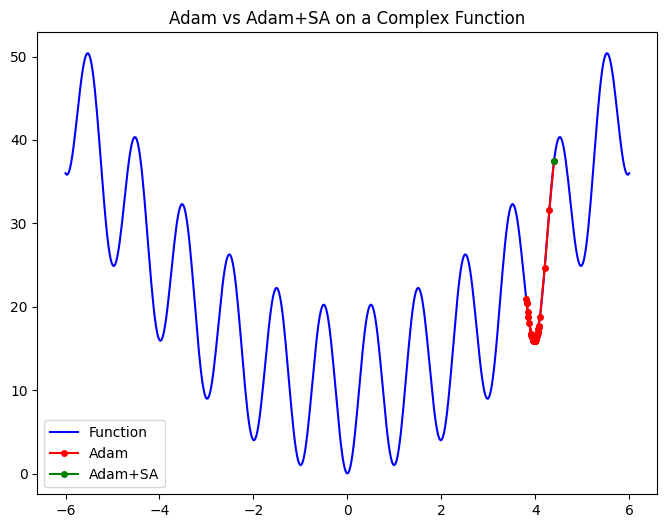

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(x):
    return x**2 - 10 * np.cos(2 * np.pi * x) + 10  # Rastrigin function

# Compute gradient
def df(x):
    return 2*x + 20 * np.pi * np.sin(2 * np.pi * x)  # Gradient of Rastrigin

# Initialize parameters
learning_rate = 0.1
beta1 = 0.9  # Momentum term
beta2 = 0.999  # RMS term
epsilon = 1e-8  # Small constant to prevent division by zero
T = 1.0  # Initial temperature for SA
cooling_rate = 0.99  # Cooling rate

x_adam = 4.4  # Start point for Adam
m_adam, v_adam = 0, 0
adam_steps = [x_adam]
momentum_threshold = 0.01  # If momentum is less than this, apply SA
x_sa = 4.4  # Start point for SA
sa_steps = [x_sa]

# Adam + Simulated Annealing optimization
for t in range(1, 100):
    # Adam update
    grad_adam = df(x_adam)
    m_adam = beta1 * m_adam + (1 - beta1) * grad_adam
    v_adam = beta2 * v_adam + (1 - beta2) * (grad_adam ** 2)
    m_hat_adam = m_adam / (1 - beta1 ** t)
    v_hat_adam = v_adam / (1 - beta2 ** t)

    if abs(m_adam) < momentum_threshold:
        new_x = x_adam + np.random.uniform(-1, 1)  # Random perturbation
        delta_f = f(new_x) - f(x_adam)

        if delta_f < 0 or np.exp(-delta_f / T) > np.random.rand():
            x_adam = new_x  # Accept new solution

        T *= cooling_rate  # Reduce temperature
    else:
        x_adam -= learning_rate * m_hat_adam / (np.sqrt(v_hat_adam) + epsilon)  # Normal Adam update

    adam_steps.append(x_adam)

# Plot function and optimization paths
x_vals = np.linspace(-6, 6, 500)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="Function", color="blue")
plt.plot(adam_steps, [f(x) for x in adam_steps], 'ro-', label="Adam", markersize=4)
plt.plot(sa_steps, [f(x) for x in sa_steps], 'go-', label="Adam+SA", markersize=4)
plt.legend()
plt.title("Adam vs Adam+SA on a Complex Function")
plt.show()


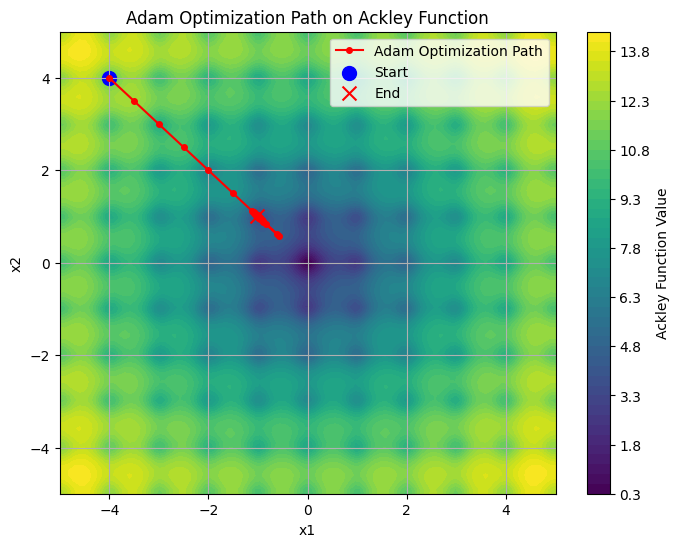

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ackley Function
def f(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.exp(1) + 20

# Gradient of Ackley function
def df(x):
    denom = np.sqrt(0.5 * (x[0]**2 + x[1]**2)) + 1e-8  # Avoid division issues
    grad_x1 = 0.2 * x[0] * np.exp(-0.2 * denom) / denom + 2 * np.pi * np.sin(2 * np.pi * x[0]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))
    grad_x2 = 0.2 * x[1] * np.exp(-0.2 * denom) / denom + 2 * np.pi * np.sin(2 * np.pi * x[1]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))
    return np.array([grad_x1, grad_x2])

# Adam optimizer parameters
learning_rate = 0.5  # Reduced learning rate
beta1 = 0.9
beta2 = 0.95
epsilon = 1e-8

# Initialize variables
x_adam = np.array([-4.0, 4.0])
m = np.zeros_like(x_adam)
v = np.zeros_like(x_adam)
t = 0

adam_steps = [x_adam.copy()]

# Gradient Descent with Adam
for _ in range(100):
    t += 1
    grad = df(x_adam)

    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * grad**2

    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)

    x_adam -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    x_adam = np.clip(x_adam, -5, 5)  # Ensure values remain within bounds
    adam_steps.append(x_adam.copy())

# Convert trajectory to array
path = np.array(adam_steps)

# Plot Ackley function contour
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_vals = np.array([f([x, y]) for x, y in zip(np.ravel(x_grid), np.ravel(y_grid))])
z_grid = z_vals.reshape(x_grid.shape)

plt.figure(figsize=(8, 6))
plt.contourf(x_grid, y_grid, z_grid, levels=50, cmap="viridis")
plt.colorbar(label="Ackley Function Value")

# Plot optimization path
plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label="Adam Optimization Path")
plt.scatter(path[0, 0], path[0, 1], color='blue', marker='o', s=100, label="Start")
plt.scatter(path[-1, 0], path[-1, 1], color='red', marker='x', s=100, label="End")

# Labels and legend
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Adam Optimization Path on Ackley Function")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

def gradient(f, X, h):
    grad = []
    for i in range(len(X)):
        Xgplus = np.array([x if not i == j else x + h for j, x in enumerate(X)])
        Xgminus = np.array([x if not i == j else x - h for j, x in enumerate(X)])
        grad.append(f(*Xgplus) - f(*Xgminus) / (2 * h))
    return np.array(grad)

def vanilla_update(epoch, X, f, lr, h):
    grad = gradient(f, X, h)
    X1 = np.zeros_like(X)
    for i in range(len(X)):
        X1[i] = X[i] - lr * grad[i]
    # print('epoch: ', epoch, 'point: ', X1, 'gradient: ', grad)
    return X1

def ackleys_function(x, y):
    return - 20 * np.exp(- 0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) \
           - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) \
           + np.e + 20


In [ ]:
def momentum_update(epoch, X, f, lr, m, h, vel=[]):
    grad = gradient(f, X, h)
    X1 = np.zeros_like(X)
    for i in range(len(X)):
        vel[i] = m * vel[i] + lr * grad[i]
        X1[i] = X[i] - vel[i]
    print('epoch: ', epoch, 'point: ', X1, 'gradient: ', grad, 'velocity: ', vel)
    return X1, vel


Converged.


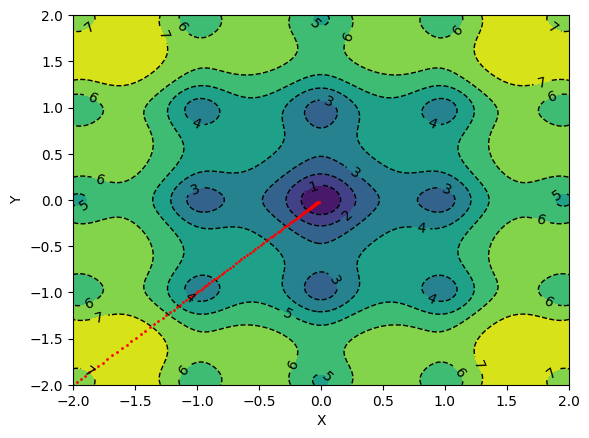

In [ ]:
if __name__ == '__main__':

    x = np.linspace(-2, 2, 1000)

    h = 1e-3

    f = ackleys_function

    a, b = np.meshgrid(x, x)
    Z = f(a, b)
    contours = plt.contour(a, b, Z, colors='black',
                           linestyles='dashed',
                           linewidths=1)
    plt.clabel(contours, inline=1, fontsize=10)
    plt.contourf(a, b, Z)
    plt.xlabel('X')
    plt.ylabel('Y')

    point = np.array([-2., -2.])

    i = 0
    lr = 0.00001
    while True:
        new_point = vanilla_update(i+1, point, f, lr, h)
        plt.plot(*point, 'ro', ms=1)
        if np.sum(abs(new_point - point)) < h:
            print('Converged.')
            break
        point = new_point
        i += 1

    plt.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Define Himmelblau's function
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def rugged_function(x, y):
    return np.sin(5*x) * np.cos(5*y) + (x**2 + y**2) / 100

# Create mesh grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

Z_min, Z_max = Z.min(), Z.max()
Z_norm = (Z - Z_min) / (Z_max - Z_min)

# Create 3D surface plot using normalized Z
fig = go.Figure(data=[go.Surface(z=Z_norm, x=X, y=Y, colorscale='viridis')])


# Create 3D surface plot using Plotly
# fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])

# Labels and title
fig.update_layout(title="Loss Surface", scene=dict(
    xaxis_title='theta 0', yaxis_title='theta 1', zaxis_title='Z'
))

fig.update_layout(scene_camera=dict(eye=dict(x=1.2, y=1.2, z=1.2)))

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Weierstrass function definition
def weierstrass(x, y, a=0.5, b=3, n=20):
    return sum(a**k * np.cos(b**k * np.pi * x) * np.cos(b**k * np.pi * y) for k in range(n))

# Create grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = weierstrass(X, Y)

# Create 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale="Viridis")])

fig.update_layout(
    title="Weierstrass Function (Nowhere Differentiable)",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Weierstrass(X, Y)"
    )
)

fig.show()
